# Introduction

## This section going to cover;

- Univariate Analysis for Continuous Variables and Categorical Variables
- Bivariate Analysis for Continuous Variable vs Continuous Variable, Categorical Variable vs Categorical Variable
- Multivariate Analysis for Numerical-Numerical-Categorical Variables
- Correlation
- Create Contingency Tables
- Interpret Results of analysis
- <b>Note:</b> Data used are from kaggle, <a href="https://www.kaggle.com/datasets/samuelcortinhas/credit-card-approval-clean-data?resource=download">Credit Card Approvals(Clean Data)</a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# Loading Dat

In [2]:
card_approval = pd.read_csv("./data/clean_dataset.csv")
card_approval.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [4]:
# get summary of the data
card_approval.info()

# Check if there is any dublicate
card_approval.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


False

<b>Columns holding categorical data</b> : Gender, Married, BankCustomer, Industry, Ethinicity, PriorDefault, Employed, DrivingLicense, Citizen, Approved
<b>Columns holding continuous data</b>: Age, debt, YearsEmployed, CreditScore, Income

Note: I have dropped the ZipCode column because that column won’t help in analysis.

# Univariate Analysis
In order to understand the data contained by only one variable and don’t want to deal with the causes or effect relationships then a Univariate analysis technique is used.

## Univariate Analysis of continuous Variables

In [105]:
# use the describe function to get the descriptive statistics of continuous variables
continuous_data = card_approval[["Age","Debt","YearsEmployed","CreditScore","Income"]].describe()
continuous_data

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,1017.385507
std,11.860245,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


- describe function, give the mean, std, min, max, 25th percentile, 50th percentile, and 75% percentile values of the columns.
- It shows that the minimum age among the applicants is 13.75. Also, the minimum value of the YearsEmployed column is 0. This tells that people without any employment history also applied for a credit card. A similar type of observation can be seen for other continuous columns.

# Plotting

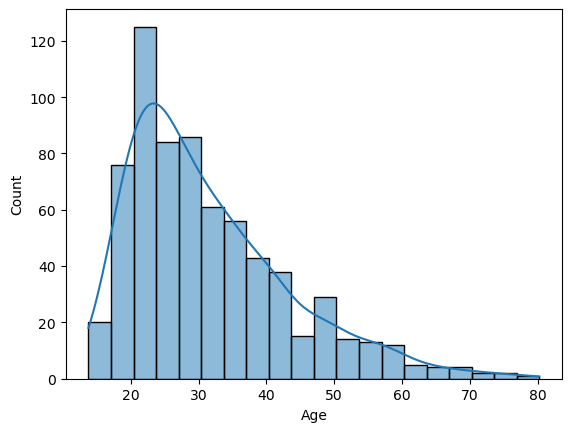

In [82]:
# Histogram for the Age column
sns.histplot(card_approval.Age, kde=True);

By analyzing the above plot, shows that very few people applied for credit cards after turning 50. Also, people between the ages of 20–and 40 applied the most as compared to other groups. This provides an insight that people tend to apply for credit cards in the early phase of their lives. Hence, credit card issuing firms can target people in the age group 20–40.

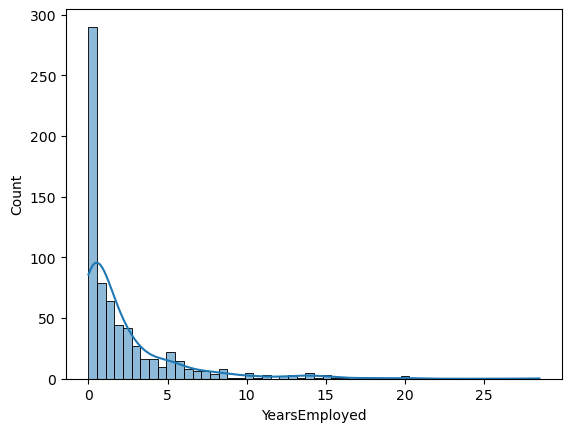

In [83]:
# Histogram for the YearsEmployed column
sns.histplot(card_approval.YearsEmployed, kde=True);

The above histogram shows that people tend to apply for credit cards at a very early stage of their careers. The lower frequency in the region above 5 YOE may be due to the reason that people apply for credit cards in an early stage of their careers. Hence, they possess credit cards when they are professionally experienced (>5 YOE). Thus, they don’t need to apply for cards in that stage.

## Univariate Analysis of Categorical Variables

<Axes: xlabel='Gender', ylabel='count'>

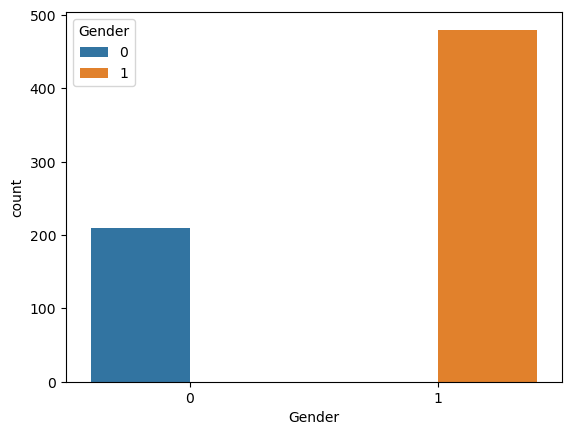

In [84]:
# fig, ax = plt.subplots(2,2)
# plot count plot for the gender column
sns.countplot(data=card_approval, x=card_approval.Gender, hue=card_approval.Gender)

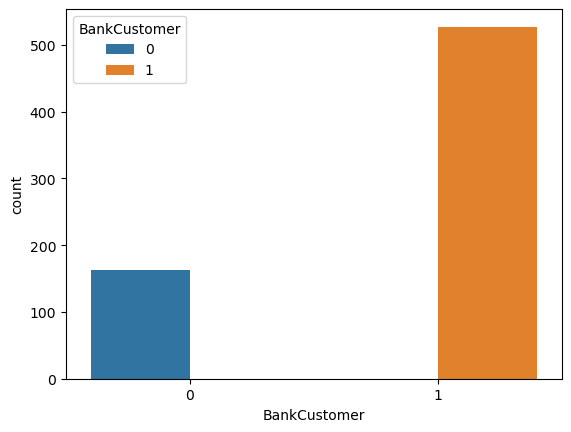

In [85]:
# plot count for the BankCustomer
sns.countplot(data=card_approval, x=card_approval.BankCustomer, hue=card_approval.BankCustomer);

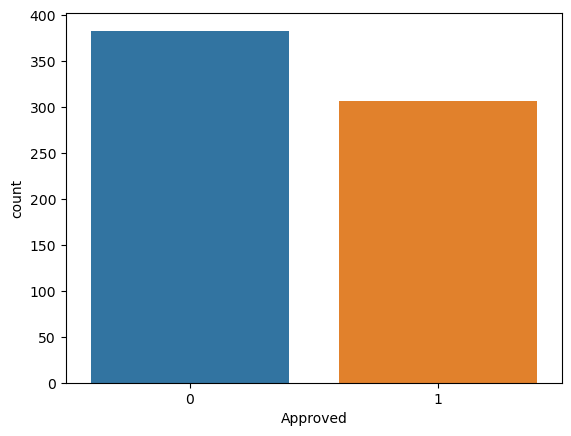

In [86]:
# plot count for Approved column
sns.countplot(data=card_approval, x=card_approval.Approved);

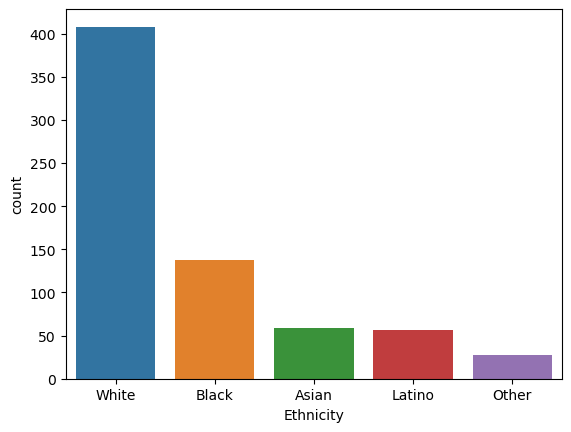

In [87]:
# plot count for Ethnicity column
sns.countplot(data=card_approval, x=card_approval.Ethnicity);

<i>Observations</i>:

1. Males (Gender -1 ) applied more than women (Gender -0) did.
2. People having bank accounts applied more than people who don’t have bank accounts.
3. The trend in ethnicity might be due to the region the data was collected from.
4. The majority of applications were rejected, i.e., less than 50% of the applications were approved.

# Bivariate Analysis
When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.

## Bivariate Analysis of Continuous Variables:

In [88]:
# check the correlation between the continuous variables
continuous_data.corr()

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.000000,0.998305,0.998330,0.999228,-0.064285
Debt,0.998305,1.000000,0.999979,0.998224,-0.111378
YearsEmployed,0.998330,0.999979,1.000000,0.998431,-0.108044
CreditScore,0.999228,0.998224,0.998431,1.000000,-0.052218
Income,-0.064285,-0.111378,-0.108044,-0.052218,1.000000


### Heatmap and Scatter plot

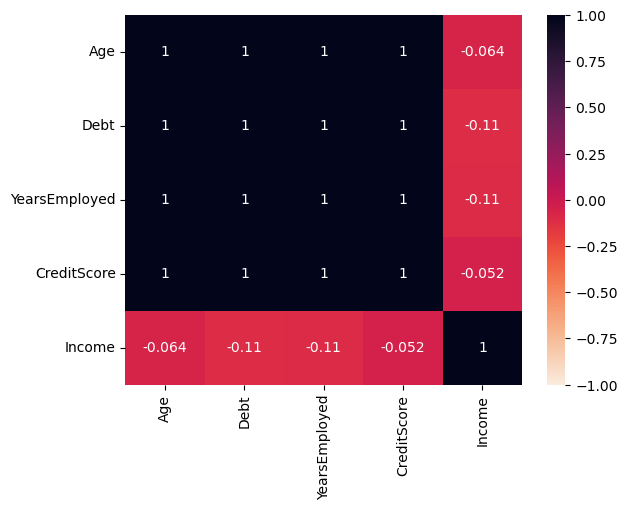

In [110]:
# seaborn heatmap of the correlation
sns.heatmap(continuous_data.corr(), vmin=-1, vmax=1,
           annot=True, cmap="rocket_r");

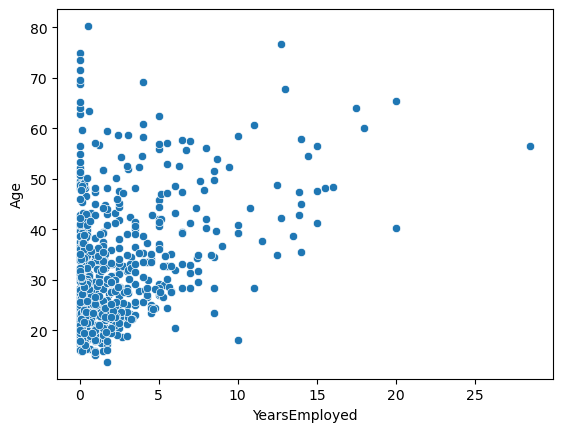

In [112]:
# scatterplot of some variables
sns.scatterplot(x=card_approval.YearsEmployed, y=card_approval.Age);

## Bivariate Analysis of Categorical Variables vs Continuous Variables:
This try to see how values of continuous variables behave for different values of categorical variables.

using ‘Approved’ column of the data as the categorical variable for analysis. Comparing the column ‘Approved’ column with other columns can provide us with some useful insights.

<b>Groupby</b>:Perform the GroupBy operation on the continuous variables. Groupby allows to split data into separate groups to perform computations for better analysis.

In [116]:
grouped_data = card_approval.groupby(by="Approved").agg("mean")[["Age","Debt","YearsEmployed","CreditScore","Income"]]
grouped_data

C:\Users\DAVID ANDERSON\AppData\Local\Temp\ipykernel_17168\687871415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = card_approval.groupby(by="Approved").agg("mean")[["Age","Debt","YearsEmployed","CreditScore","Income"]]


,Age,Debt,YearsEmployed,CreditScore,Income
Approved,,,,,
0,29.773029,3.839948,1.257924,0.631854,198.605744
1,33.686221,5.904951,3.427899,4.605863,2038.859935


In the above table, it shows that the average credit score of people who got approval is more than people who didn’t get approval. The same pattern is observed for the Income and YearEmployed columns. This is very understandable because companies don’t issue credit cards to people with low credit scores and low income. Also, companies prefer decent employment history for issuing credit cards.

### Kernel Density Estimate (KDE) plot

This is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. 
KDE represents the data using a continuous probability density curve in one or more dimensions.

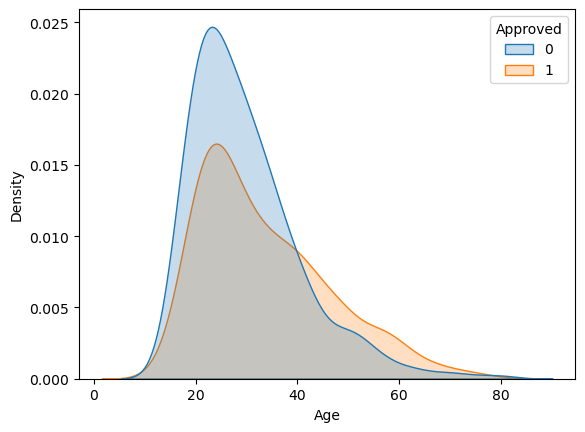

In [119]:
sns.kdeplot(data=card_approval, x="Age", hue="Approved", fill=True);

The above plot shows how the distribution of variables (Age) behaves separately for the “Approved‘ and ‘Rejected’ cases.

## Bivariate Analysis of Categorical Variables vs Categorical Variables:

This shows the relationship between categorical variables. Again keep the ‘Approved’ column fixed and compare it with other columns.

### Countplot of categorical variables with hue="Approved"

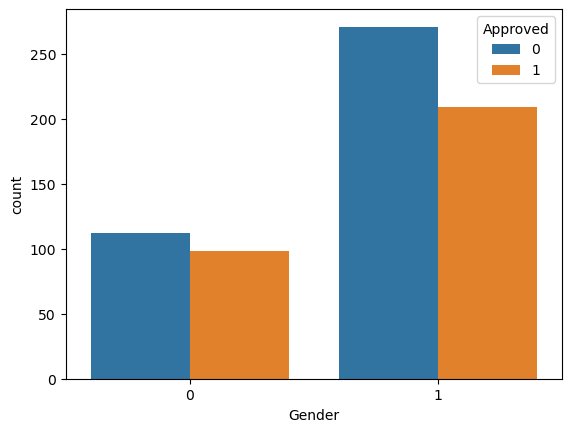

In [123]:
sns.countplot(data=card_approval, x="Gender", hue="Approved");

By looking at the above plot, it does not seem that the Gender of applicants is considered a criterion to approve applications.

In [125]:
# also a contingency table can be used to verify the above 
#observation and to get the actual numbers

pd.crosstab(card_approval.Gender, card_approval.Approved, margins=True)

Approved,0,1,All
Gender,,,
0,112,98,210
1,271,209,480
All,383,307,690


# Multivariate Analysis

This shows the relations between continuous variables and the ‘Approved’ column. To do that, we will plot a pair plot, with Hue as "Approved".

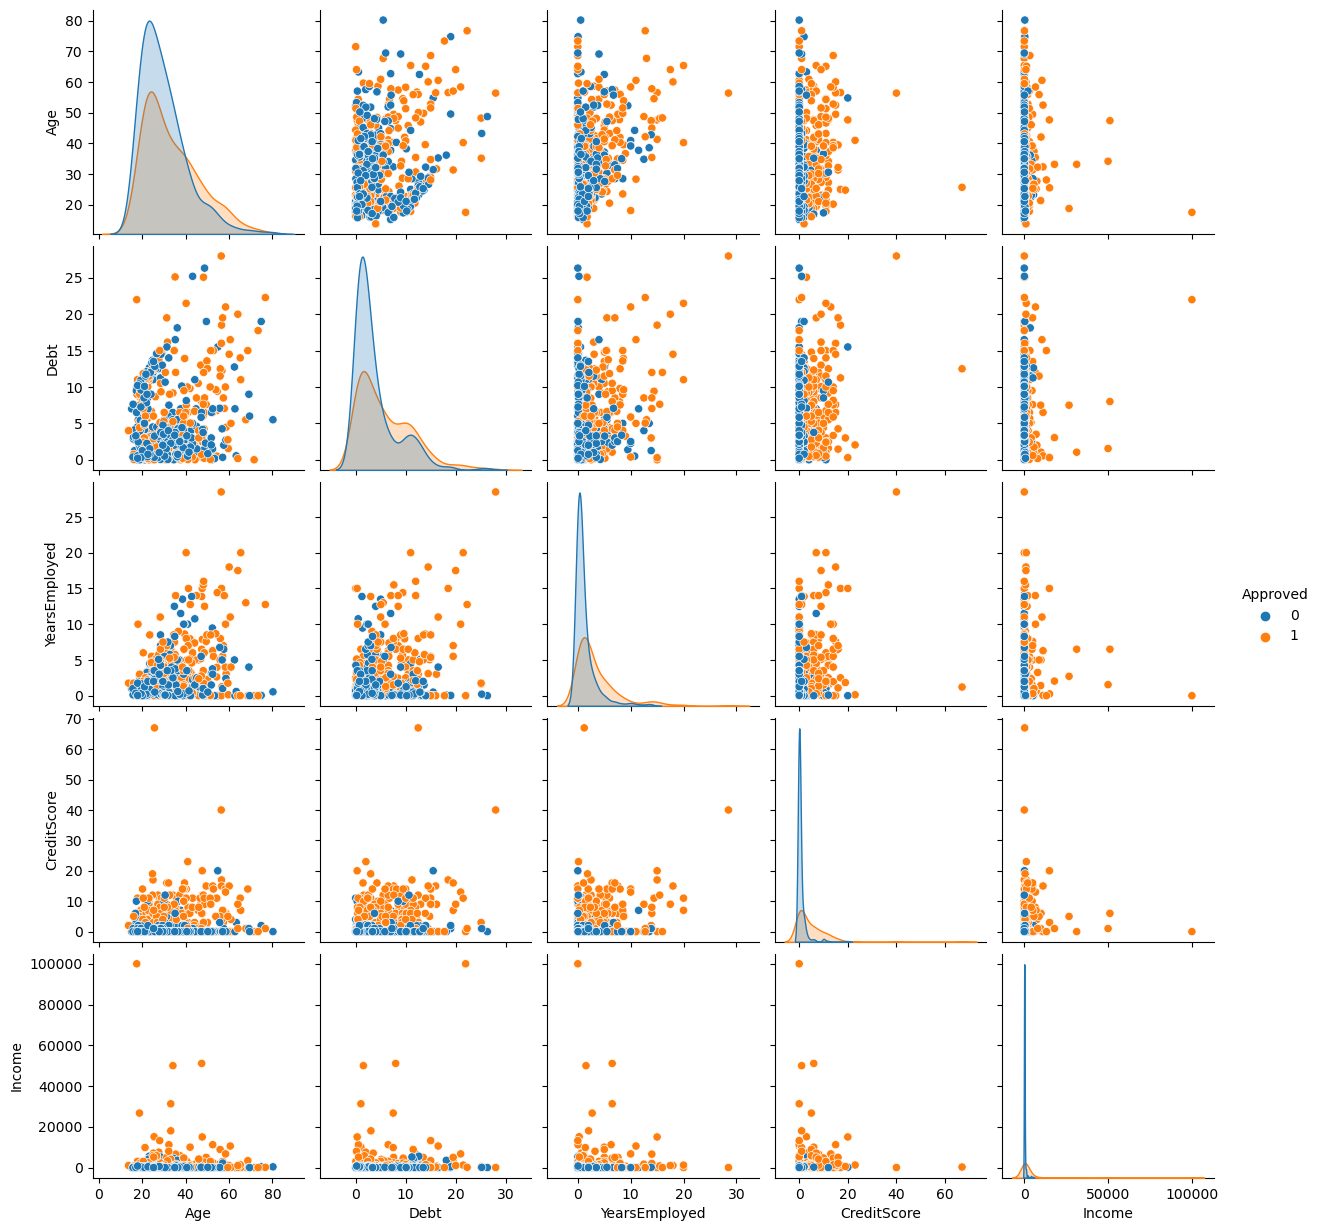

In [129]:
sns.pairplot(data=card_approval[["Age","Debt","YearsEmployed","CreditScore","Income", "Approved"]], hue="Approved");

This can be used to see how two continuous features behave for different classes.

<center> <h1>END</h1></center>